In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2025-06-16 12:25:07.869284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750076708.057916      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750076708.114235      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
dataset_dir = "/kaggle/input/stanford-dogs-dataset/images/Images"
batch_size = 32
img_height = 224
img_width = 224
validation_split = 0.3
seed = 123

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

num_val_test_batches = tf.data.experimental.cardinality(val_test_ds).numpy()
num_test_batches = int(num_val_test_batches * 0.5)
val_ds = val_test_ds.skip(num_test_batches)
test_ds = val_test_ds.take(num_test_batches)


Found 20580 files belonging to 120 classes.
Using 14406 files for training.


I0000 00:00:1750076737.199555      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 20580 files belonging to 120 classes.
Using 6174 files for validation.


In [3]:
class_names = train_ds.class_names

In [4]:
import os 
print(os.listdir())

['.virtual_documents']


In [5]:
model = tf.keras.models.load_model('/kaggle/input/model-effectivenetv2l/tensorflow2/default/1/model_large.keras')

In [6]:
import tensorflow as tf
y_true = []
y_pred = []
for x,y in test_ds:
  y_true.append(y)
  y_pred.append(tf.argmax(model.predict(x),axis = 1))


I0000 00:00:1750076785.901765      99 service.cc:148] XLA service 0x7d9c80123a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750076785.902519      99 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750076788.723313      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


I0000 00:00:1750076796.395727      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [7]:
  
y_pred = tf.concat(y_pred, axis=0)
y_true = tf.concat(y_true, axis=0)

In [8]:
cm = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

In [9]:
cm

array([[32,  0,  0, ...,  0,  0,  0],
       [ 0, 22,  0, ...,  0,  0,  0],
       [ 1,  0, 23, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 25,  0,  0],
       [ 0,  0,  0, ...,  2, 22,  0],
       [ 0,  0,  0, ...,  0,  0, 26]], dtype=int32)

In [10]:
np.save('confusion_matrix.npy', cm)

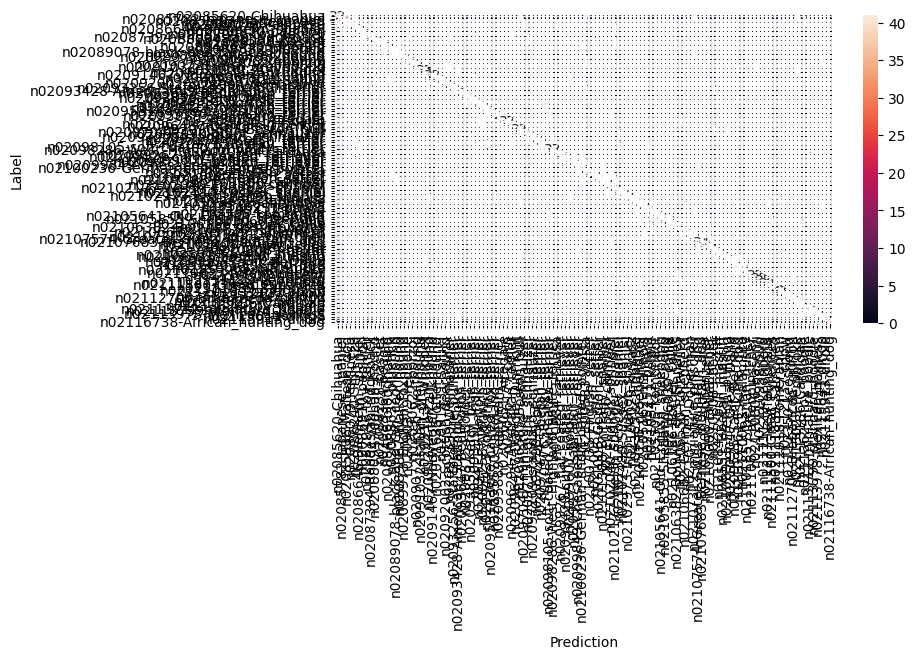

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.heatmap(cm,
            xticklabels=class_names,
            yticklabels=class_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [18]:
# get the best classified dog and the worst one

dict_performance = {}

for i in range(cm.shape[0]):
    n_correctly = cm[i, i]
    n_incorrectly = 0
    name_dogs_inc = []
    for j in range(cm.shape[1]):
        if (i != j) and (cm[i,j] > 0):
            n_incorrectly += cm[i,j]
            name_dogs_inc.append(class_names[j])
            
    prop_inc = n_incorrectly / (n_correctly + n_incorrectly)
    dict_performance[class_names[i]] = [prop_inc, name_dogs_inc]
            
        
        
    

In [19]:
dict_performance

{'n02085620-Chihuahua': [0.1111111111111111,
  ['n02096585-Boston_bull',
   'n02100583-vizsla',
   'n02107312-miniature_pinscher',
   'n02113023-Pembroke']],
 'n02085782-Japanese_spaniel': [0.043478260869565216, ['n02086240-Shih-Tzu']],
 'n02085936-Maltese_dog': [0.14814814814814814,
  ['n02085620-Chihuahua', 'n02098413-Lhasa', 'n02113624-toy_poodle']],
 'n02086079-Pekinese': [0.09375,
  ['n02086240-Shih-Tzu',
   'n02097047-miniature_schnauzer',
   'n02112018-Pomeranian']],
 'n02086240-Shih-Tzu': [0.09375,
  ['n02085936-Maltese_dog',
   'n02098413-Lhasa',
   'n02105641-Old_English_sheepdog']],
 'n02086646-Blenheim_spaniel': [0.03225806451612903,
  ['n02102177-Welsh_springer_spaniel']],
 'n02086910-papillon': [0.08, ['n02085782-Japanese_spaniel']],
 'n02087046-toy_terrier': [0.2727272727272727,
  ['n02085620-Chihuahua',
   'n02096294-Australian_terrier',
   'n02107312-miniature_pinscher']],
 'n02087394-Rhodesian_ridgeback': [0.2,
  ['n02090379-redbone', 'n02092339-Weimaraner', 'n0209399

In [27]:
sorted_by_values = dict(sorted(dict_performance.items(), key=lambda item: item[1][0]))

In [28]:
sorted_by_values

{'n02088364-beagle': [0.0, []],
 'n02088466-bloodhound': [0.0, []],
 'n02090622-borzoi': [0.0, []],
 'n02091467-Norwegian_elkhound': [0.0, []],
 'n02092339-Weimaraner': [0.0, []],
 'n02093647-Bedlington_terrier': [0.0, []],
 'n02093754-Border_terrier': [0.0, []],
 'n02093859-Kerry_blue_terrier': [0.0, []],
 'n02095889-Sealyham_terrier': [0.0, []],
 'n02097047-miniature_schnauzer': [0.0, []],
 'n02099601-golden_retriever': [0.0, []],
 'n02099849-Chesapeake_Bay_retriever': [0.0, []],
 'n02100877-Irish_setter': [0.0, []],
 'n02101556-clumber': [0.0, []],
 'n02102177-Welsh_springer_spaniel': [0.0, []],
 'n02105251-briard': [0.0, []],
 'n02105641-Old_English_sheepdog': [0.0, []],
 'n02107312-miniature_pinscher': [0.0, []],
 'n02109525-Saint_Bernard': [0.0, []],
 'n02110806-basenji': [0.0, []],
 'n02111129-Leonberg': [0.0, []],
 'n02111889-Samoyed': [0.0, []],
 'n02112018-Pomeranian': [0.0, []],
 'n02112137-chow': [0.0, []],
 'n02112350-keeshond': [0.0, []],
 'n02113186-Cardigan': [0.0, []],

In [29]:
list(sorted_by_values.keys())[-1]

'n02106030-collie'

In [33]:
# worst dog with worst proportion, and the breeds it was confused with
list(sorted_by_values.keys())[-1], list(sorted_by_values.values())[-1][0], list(sorted_by_values.values())[-1][1]

('n02106030-collie',
 0.6666666666666666,
 ['n02105056-groenendael',
  'n02105855-Shetland_sheepdog',
  'n02106166-Border_collie',
  'n02111500-Great_Pyrenees'])